# EDA US Health Insurance [Probability Final Project Batch 14]

Dharmayuda Febrianto

Analytical and Data Science Student in Pacmann Academy

## Import Package

In [2]:
# Loading the necessary Libraries.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.pyplot import figure

from scipy.stats import t
pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

## Load Dataset

In [3]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis

### Shape:
shape from the data

In [4]:
print(f'Shape of the data: {data.shape}')
print(f'There are {data.shape[0]} rows in the data.')

Shape of the data: (1338, 7)
There are 1338 rows in the data.


### Data Types:
understanding the data types of various attributes.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# tipe data yang memiliki perbedaan
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [7]:
# Check Individual Kolom
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
# Transform the Index object to a series, and grouping by data types:
g = data.columns.to_series().groupby(data.dtypes).groups
g

{int64: ['age', 'children'], float64: ['bmi', 'charges'], object: ['sex', 'smoker', 'region']}

In [9]:
dt = {k.name: v for k, v in g.items()}

atributes_by_datatype = pd.DataFrame(list(dt.values()), index= dt.keys(), columns= ['Attr1', 'Attr2', 'Attr3'])
atributes_by_datatype

,Attr1,Attr2,Attr3
int64,age,children,None
float64,bmi,charges,None
object,sex,smoker,region


In [10]:
# Unique Values for "children":
sorted(data['children'].unique())

[0, 1, 2, 3, 4, 5]

### Data Cleaning:

In [11]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

no missing data in DataFrame

### Distribution of numerical attributes:
we could get an overview of the important statistics of the data through:

In [12]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


this cells contain the definition function to show the summary and density distribution of a numerical data with figure subplot related to data we prefer

In [13]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(14, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

this cells contain the definition function to show boxplot figure and calculate the measure of statistical skewness and total number of outlier values in dataset for various attributes through a function:

In [14]:
# Let's take a closer look at the Boxplot, and calculate the measure of skewness and totalnumber of outlier values for various attributes through a function:

def box_plot(x = 'bmi'):
    def add_values(bp, ax):
        """ This actually adds the numbers to the various points of the boxplots"""
        for element in ['whiskers', 'medians', 'caps']:
            for line in bp[element]:
                # Get the position of the element. y is the label you want
                (x_l, y),(x_r, _) = line.get_xydata()
                # Make sure datapoints exist 
                # (I've been working with intervals, should not be problem for this case)
                if not np.isnan(y): 
                    x_line_center = x_l + (x_r - x_l)/2
                    y_line_center = y  # Since it's a line and it's horisontal
                    # overlay the value:  on the line, from center to right
                    ax.text(x_line_center, y_line_center, # Position
                            '%.2f' % y, # Value (3f = 3 decimal float)
                            verticalalignment='center', # Centered vertically with line 
                            fontsize=12, backgroundcolor="white")

    fig, axes = plt.subplots(1, figsize=(4, 8))

    red_diamond = dict(markerfacecolor='r', marker='D')

    bp_dict = data.boxplot(column = x, 
                             grid=True, 
                             figsize=(4, 8), 
                             ax=axes, 
                             vert = True, 
                             notch=False, 
                             widths = 0.7, 
                             showmeans = True, 
                             whis = 1.5,
                             flierprops = red_diamond,
                             boxprops= dict(linewidth=3.0, color='black'),
                             whiskerprops=dict(linewidth=3.0, color='black'),
                             return_type = 'dict')

    add_values(bp_dict, axes)

    plt.title(f'{x.capitalize()} Boxplot', fontsize=16)
    plt.ylabel(f'{x.capitalize()}', fontsize=14)
    plt.show()
    
    skew = data[x].skew()
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    total_outlier_num = ((data[x] < (Q1 - 1.5 * IQR)) | (data[x] > (Q3 + 1.5 * IQR))).sum()
    print(f'Mean {x.capitalize()} = {data[x].mean()}')
    print(f'Median {x.capitalize()} = {data[x].median()}')
    print(f'Skewness of {x}: {skew}.')
    print(f'Total number of outliers in {x} distribution: {total_outlier_num}.')

#### Age Distribution

5 Point Summary of Age Attribute:
Age(min) : 18
Q1                    : 27.0
Q2(Median)            : 39.0
Q3                    : 51.0
Age(max) : 64


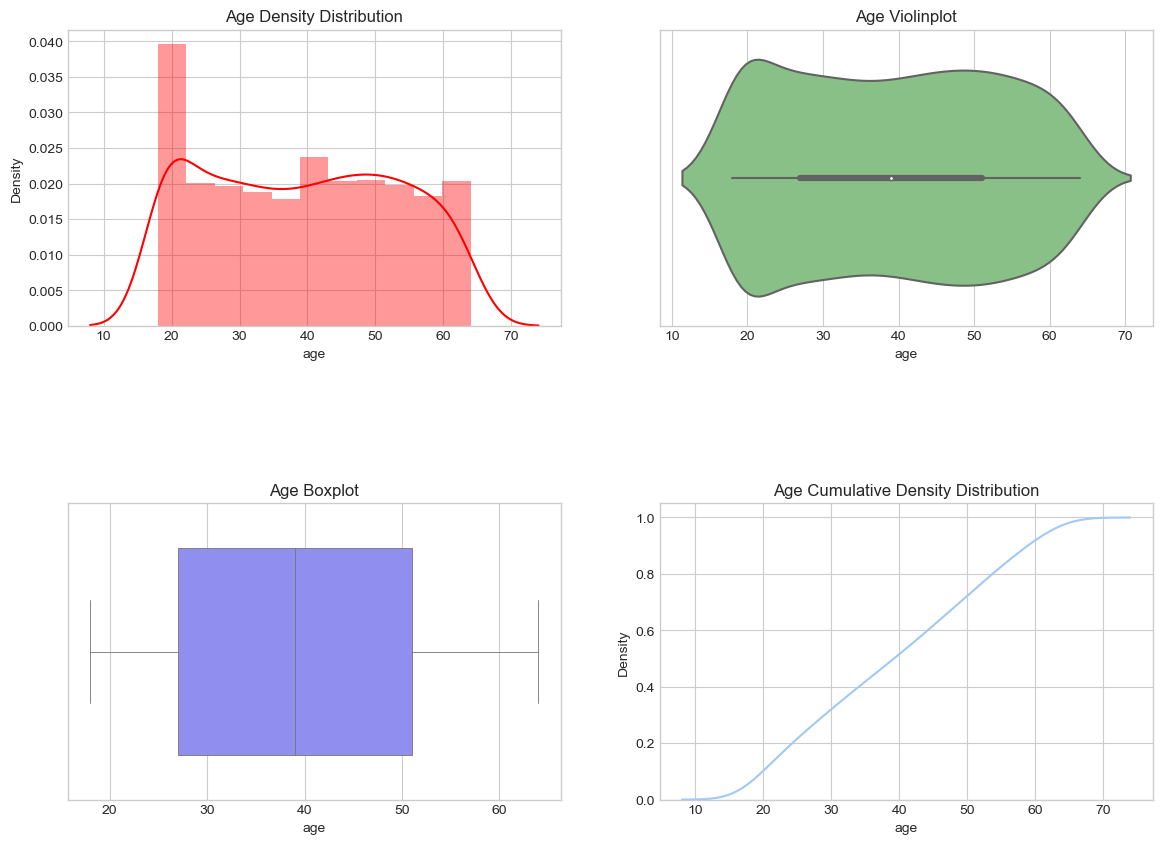

In [15]:
summary('age')

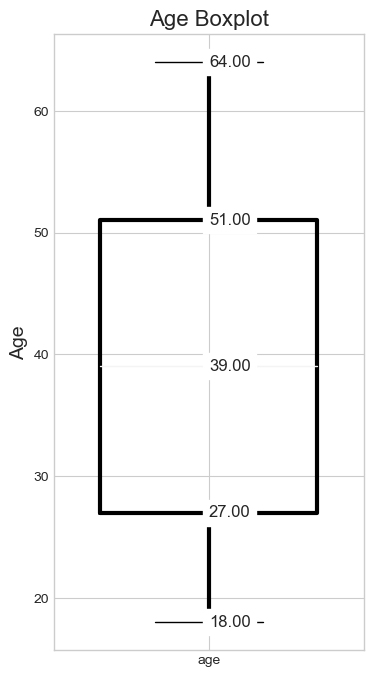

Mean Age = 39.20702541106129
Median Age = 39.0
Skewness of age: 0.05567251565299186.
Total number of outliers in age distribution: 0.


In [16]:
box_plot('age')

In [17]:
df = data[data['age'] == data['age'].max()]
print(df.head())
print()
print(f'Total number of insured people with the age of 64: {len(df)}.')

     age     sex    bmi  children smoker     region      charges
62    64    male  24.70         1     no  northwest  30166.61817
94    64  female  31.30         2    yes  southwest  47291.05500
199   64  female  39.33         0     no  northeast  14901.51670
328   64  female  33.80         1    yes  southwest  47928.03000
335   64    male  34.50         0     no  southwest  13822.80300

Total number of insured people with the age of 64: 22.


#### BMI Distribution

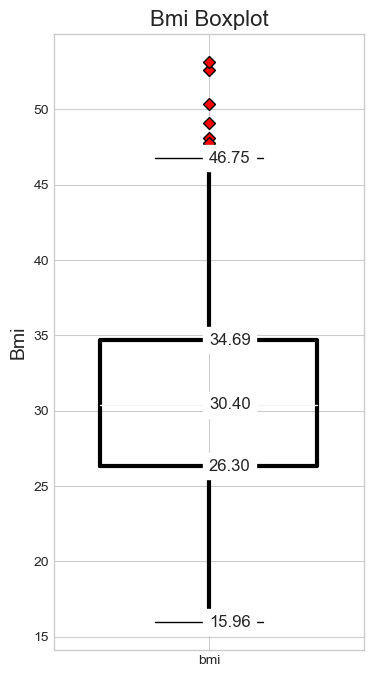

Mean Bmi = 30.663396860986538
Median Bmi = 30.4
Skewness of bmi: 0.2840471105987448.
Total number of outliers in bmi distribution: 9.


In [18]:
box_plot('bmi')

In [19]:
data[data['bmi']==data['bmi'].max()]

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627


### Analisa Variabel Kontinu

* seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16,7 k 

atau 

* Seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16,7 k

In [20]:
bmi_more_25 = data[data['bmi'] >= 25.00]
bmi_more_25

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450


In [21]:
filtered_data_upper25 = data[(data['bmi'] >= 25.00) & (data['charges'] > 16700)]
print(filtered_data_upper25)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
9      60  female  25.840         0     no  northwest  28923.13692
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
...   ...     ...     ...       ...    ...        ...          ...
1313   19  female  34.700         2    yes  southwest  36397.57600
1318   35    male  39.710         4     no  northeast  19496.71917
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[283 rows x 7 columns]


In [22]:
filtered_data_lower25 = data[(data['bmi'] <= 25.00) & (data['charges'] > 16700)]
print(filtered_data_lower25)
print(f"tabel Filtered Data lower25 : {filtered_data_lower25.shape}")

      age     sex     bmi  children smoker     region      charges
3      33    male  22.705         0     no  northwest  21984.47061
58     53  female  22.880         1    yes  southeast  23244.79020
62     64    male  24.700         1     no  northwest  30166.61817
69     28    male  23.980         3    yes  southeast  17663.14420
85     45    male  22.895         2    yes  northwest  21098.55405
98     56    male  19.950         0    yes  northeast  22412.64850
128    32  female  17.765         2    yes  northwest  32734.18630
140    34    male  22.420         2     no  northeast  27375.90478
153    42  female  23.370         0    yes  northeast  19964.74630
156    48    male  24.420         0    yes  southeast  21223.67580
219    24  female  23.210         0     no  southeast  25081.76784
224    42    male  24.640         0    yes  southeast  19515.54160
235    40  female  22.220         2    yes  southeast  19444.26580
262    52    male  24.320         3    yes  northeast  24869.8

In [23]:
data[data['bmi'] == data['bmi'].min()]

,age,sex,bmi,children,smoker,region,charges
172,18,male,15.96,0,no,northeast,1694.7964


In [24]:
data['charges'].mean(), data['charges'].median()

(13270.422265141257, 9382.033)

5 Point Summary of Charges Attribute:
Charges(min) : 1121.8739
Q1                    : 4740.28715
Q2(Median)            : 9382.033
Q3                    : 16639.912515
Charges(max) : 63770.42801


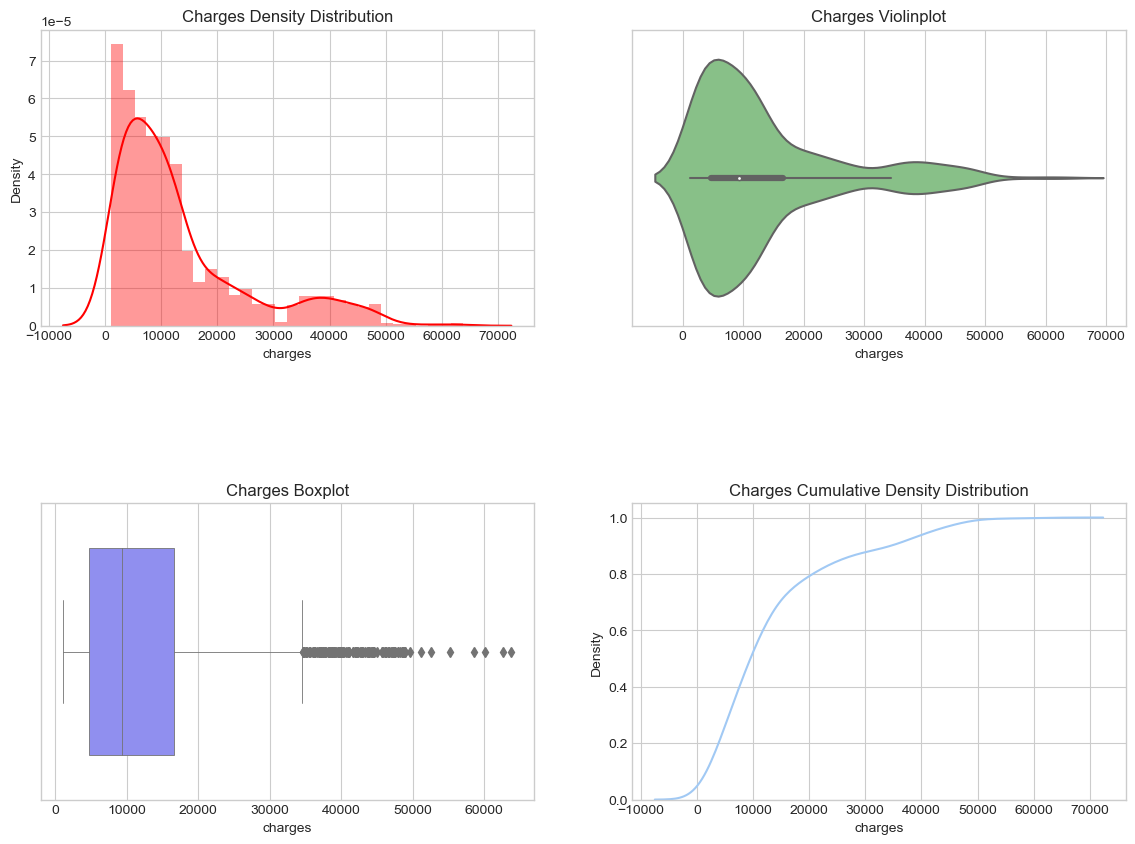

In [25]:
summary('charges')

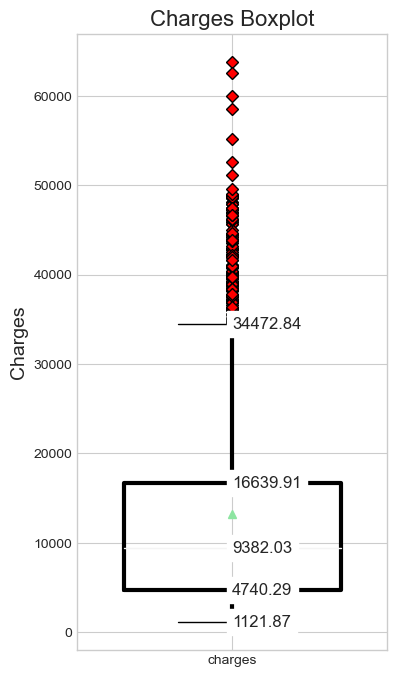

Mean Charges = 13270.422265141257
Median Charges = 9382.033
Skewness of charges: 1.5158796580240388.
Total number of outliers in charges distribution: 139.


In [26]:
box_plot('charges')

In [27]:
# Who is paying the highest charges?
data[data['charges'] == data['charges'].max()]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [28]:
# Who is the insured with the highest BMI, and how does his charges compare to the rest?
data[data['bmi'] == data['bmi'].max()]

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627


In [29]:
data['charges'].mean(), data['charges'].median()

(13270.422265141257, 9382.033)

this cells contain the definition function to show the Pie chart plot for categorical variable from the dataset

In [30]:
# Create a function that returns a Pie chart for categorical variable:
def pie_chart(x = 'smoker'):
    """
    Function creates a Pie chart for categorical variables.
    """
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

    s = data.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax.pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax.legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax.set_title(f'{x.capitalize()} Piechart')

    plt.show()

#### Sex:

<AxesSubplot:xlabel='sex', ylabel='count'>

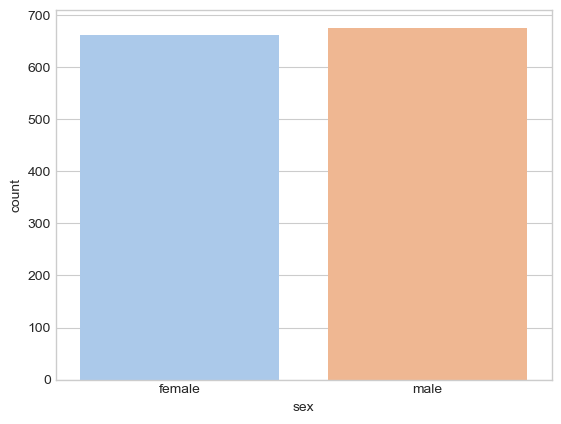

In [31]:
sns.countplot(x = 'sex', data = data)

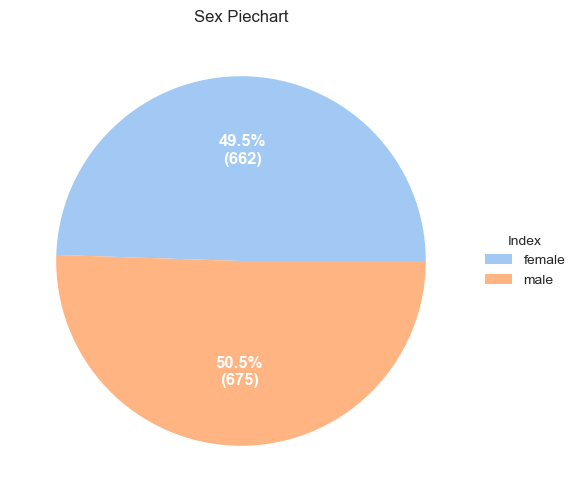

In [32]:
pie_chart('sex')

#### Smoker:

<AxesSubplot:xlabel='smoker', ylabel='count'>

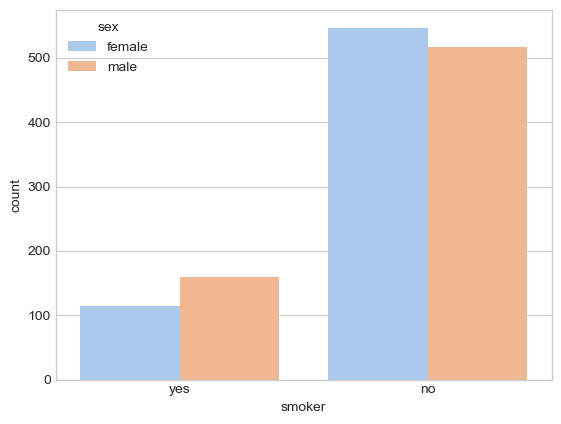

In [33]:
sns.countplot(x = 'smoker', hue = 'sex', data = data)

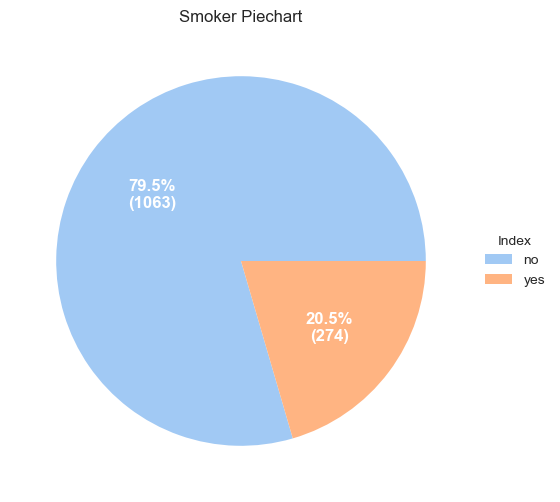

In [34]:
pie_chart('smoker')

In [35]:
data['charges'].groupby (data['smoker']).mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [36]:
data.groupby(['smoker', 'sex']).agg('count')

age  bmi  children  region  charges
smoker sex                                        
no     female  547  547       547     547      547
       male    517  517       517     517      517
yes    female  115  115       115     115      115
       male    159  159       159     159      159

<AxesSubplot:xlabel='smoker', ylabel='charges'>

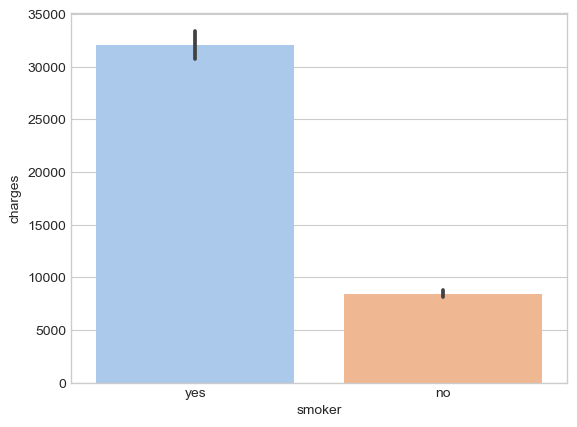

In [37]:
sns.barplot(x = 'smoker', y = 'charges', data = data)

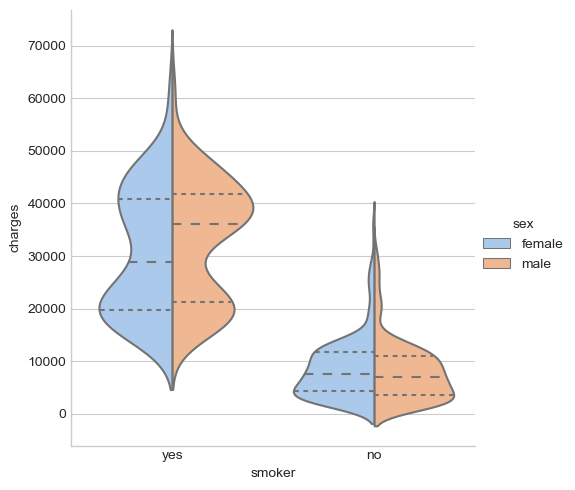

In [38]:
sns.catplot(x = 'smoker', y = 'charges', hue ='sex',
            kind= 'violin', inner='quartiles', split= True, 
            pallete='pastel', data=data);

In [39]:
data.groupby(['smoker', 'sex']).agg('count')['age'] 

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: age, dtype: int64

#### Regions

<AxesSubplot:xlabel='region', ylabel='count'>

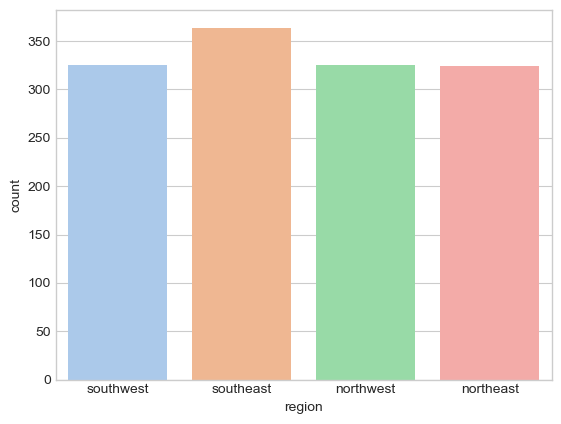

In [40]:
sns.countplot(x = 'region', data = data)

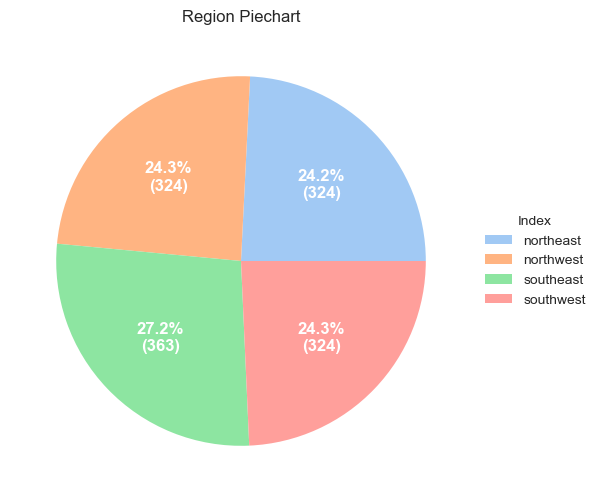

In [41]:
pie_chart('region')

#### Number of Children

<AxesSubplot:xlabel='children', ylabel='count'>

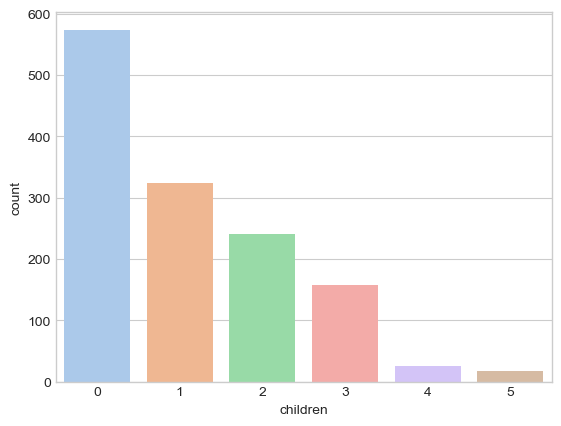

In [42]:
sns.countplot(x = 'children', data = data)

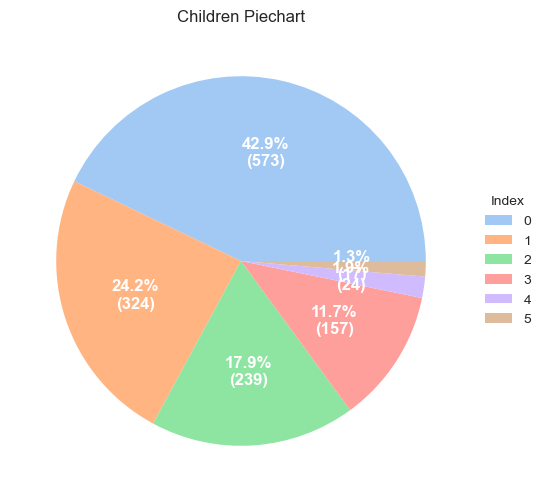

In [43]:
pie_chart('children')

In [44]:
data.groupby(['children']).agg('count')['age']

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: age, dtype: int64

### Pairplot

In [45]:
for x in ['sex', 'children', 'smoker', 'region']:
    data[x] = data[x].astype('category')

data.dtypes

age            int64
sex         category
bmi          float64
children    category
smoker      category
region      category
charges      float64
dtype: object

In [46]:
type(data.dtypes)

pandas.core.series.Series

In [47]:
# Next, we select all columns of the dataFrame with datatype = category:
cat_columns = data.select_dtypes(['category']).columns
cat_columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [48]:
# Finally, we transform the original columns by replacing the elements with their category codes:
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


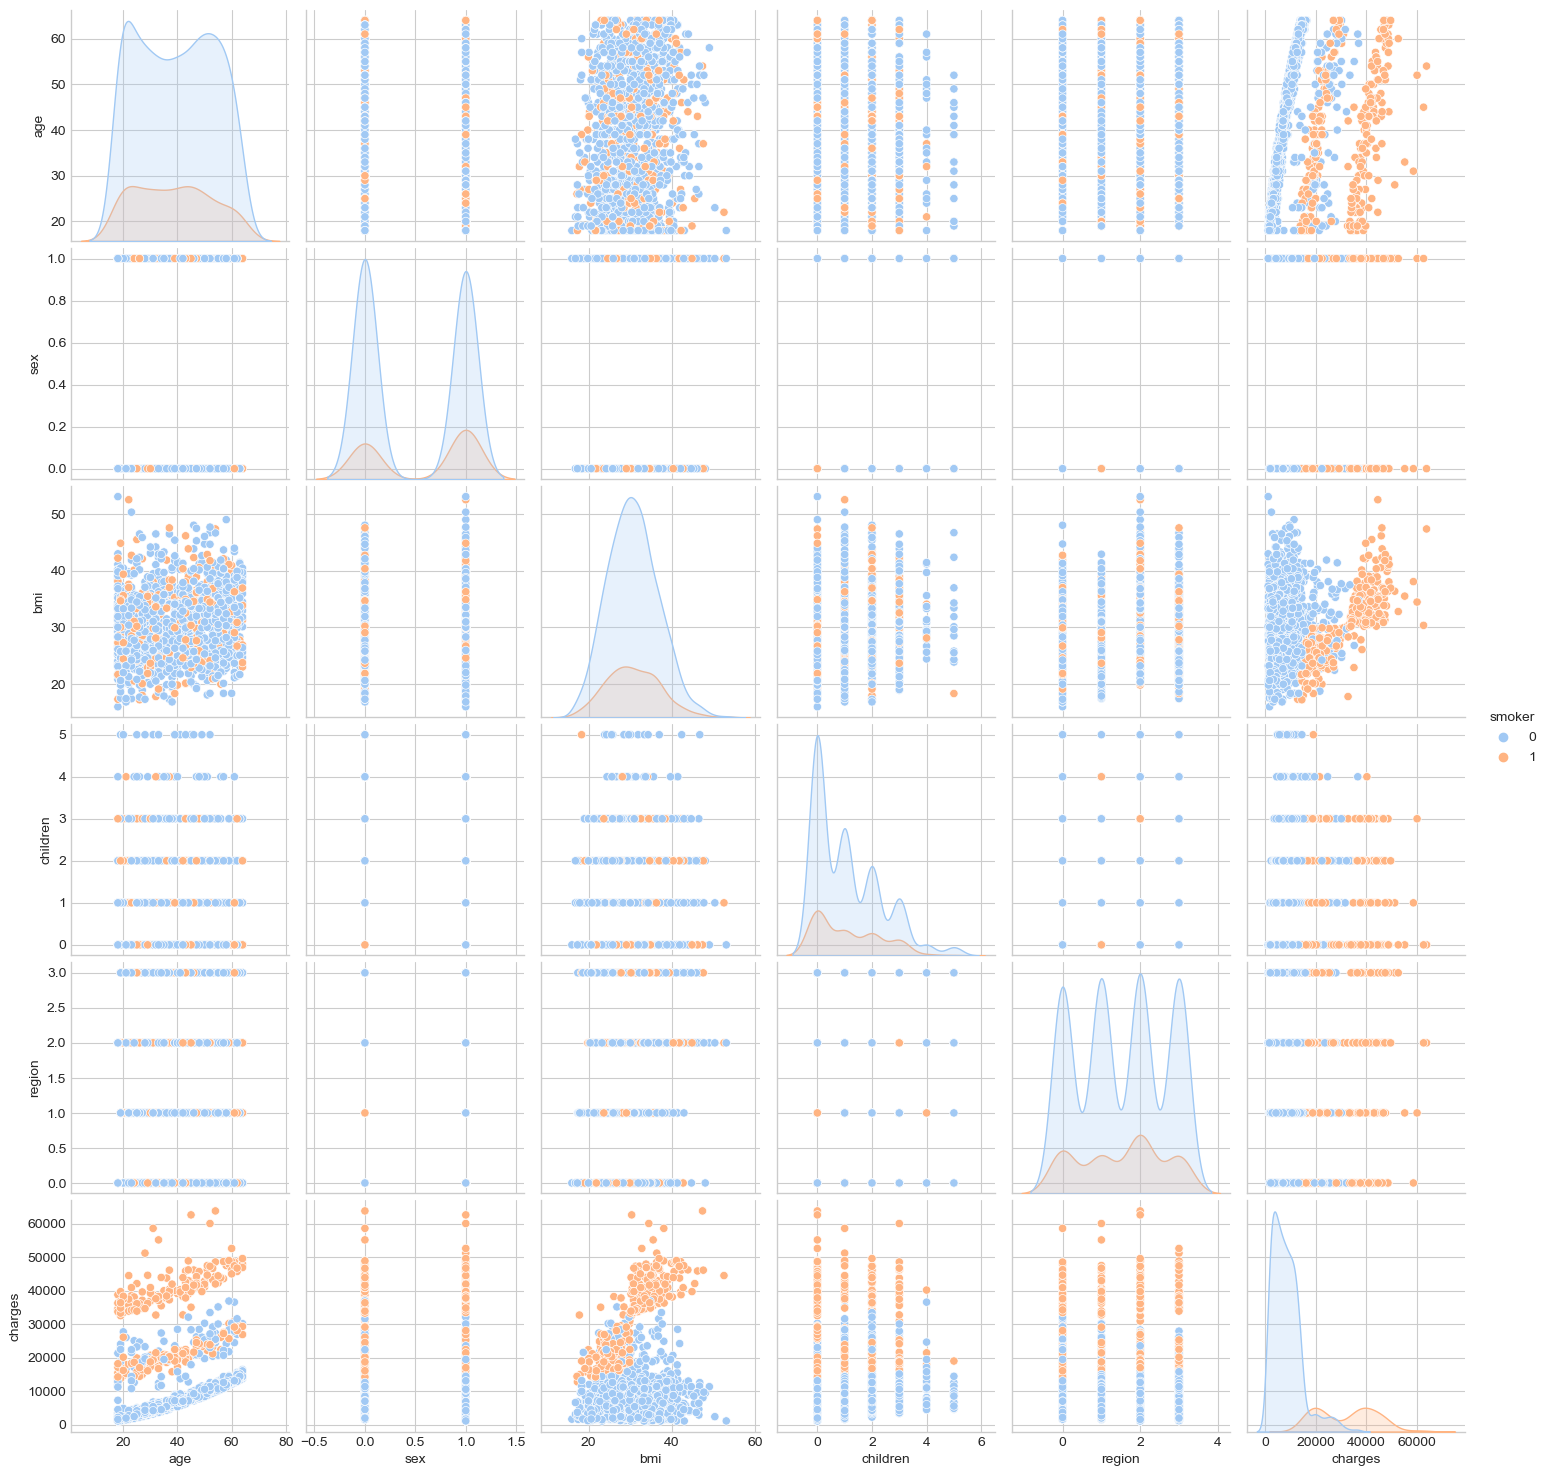

In [49]:
# Now we can plot all columns of our dataset in a pairplot!
sns.pairplot(data, hue = 'smoker')

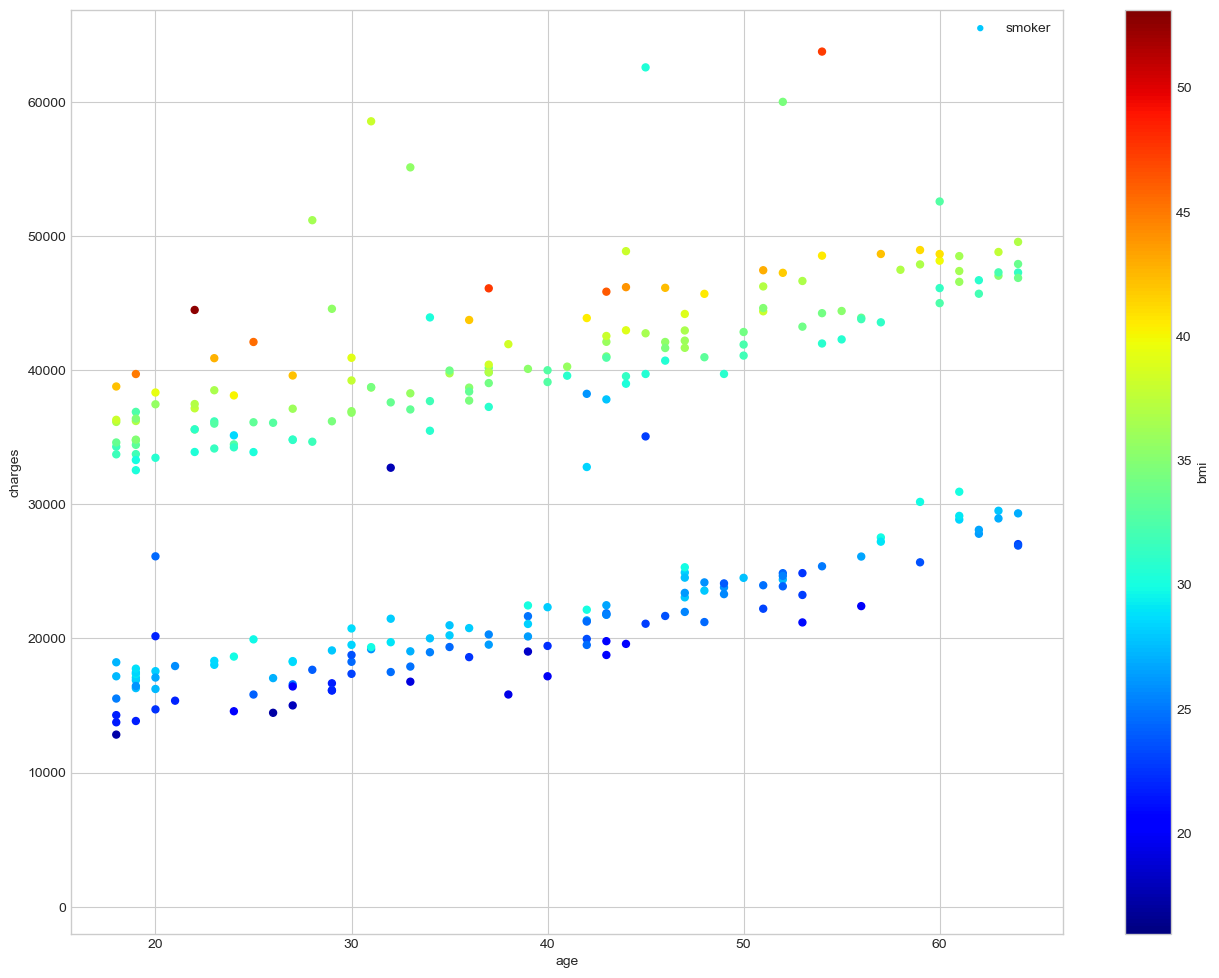

In [50]:
data.plot(kind = 'scatter', x = 'age', y = 'charges', s = data['smoker']*25, label = 'smoker', figsize=(16, 12), c='bmi', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)
plt.legend()

### Corelation

corelation between different attributes in the dataset

<AxesSubplot:>

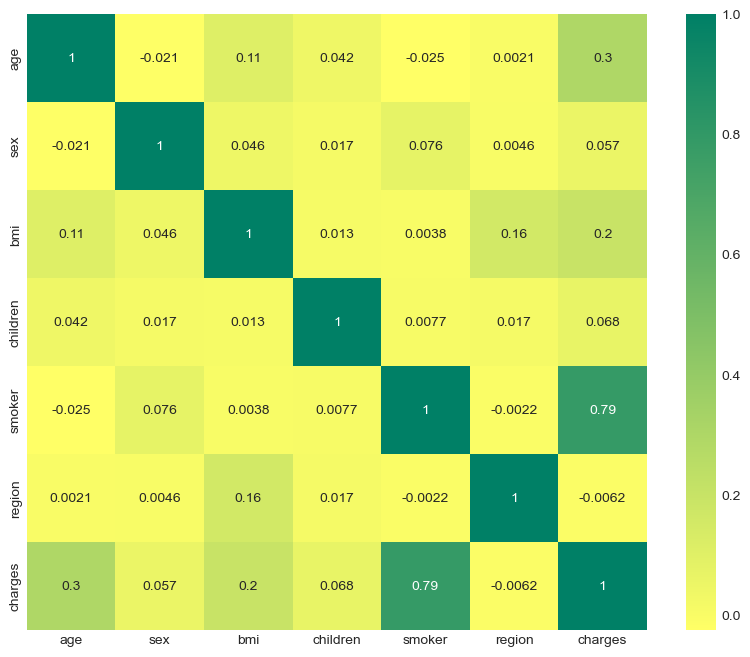

In [51]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')

Observation:
* from the heatmap plot, we could conclude the correlation that the premium charges show a weak positive corelation with Age and BMI of the insured and a strong positive correlation with smoking habbit

## Hypothesis Testing:

A **Statistical Hypothesis Test** is a way of drawing conclusions from sample data. It helps us explore questions about the distribution and relationships among different attributes in our dataset. The process involves testing hypotheses to make informed decisions based on statistical analysis.

1. Formulate the null hypothesis $H_0$ and the alternative hypothesis $H_A$
2. Select an appropriate statistical test and the corresponding test statistic
3. Choose level of significance $a$ (generally taken as 0.05)
4. Collect data and calculate the value of test statistic
5. Determine the probability associated with the test statistic under the null hypothesis using sampling distribution of the test statistic
6. Compare the probability associated with the test statistic with level of significance specified

### Do charges of people who smoke differ signicantly from the people who don't?
#### Step 1 define the null and alternatives hypothesis

* $H_0$: $\mu_s$ = $\mu_n$
* $H_A$: $\mu_s$ != $\mu_n$

where 

* $\mu_s$ = Mean Charge of all smokers in our data
* $\mu_n$ = Mean Charge of all non - smokers in our data

#### Step 2: Select an appropriate statistical test and the corresponding test statistic
We select a 2-sample t-test as our statistical test and the corresponding t statistic as our test statistic.
#### Step 3: Choose level of significance α
We select α = 0.05
#### Step 4: Collect data and calculate the value of test statistic

In [52]:
smokers = data[data['smoker'] == 0]
nonsmokers = data[data['smoker'] == 1]
charge_smokers = smokers['charges']
charge_nonsmokers = nonsmokers['charges']

print(f'Number of smokers: {smokers.shape[0]}')
print(f'Variance in charges of smokers : {np.var(charge_smokers)}')
print(f'Number of non - smokers: {nonsmokers.shape[0]}')
print(f'Variance in charges of non smokers : {np.var(charge_nonsmokers)}')

Number of smokers: 1064
Variance in charges of smokers : 35891656.00316425
Number of non - smokers: 274
Variance in charges of non smokers : 132721153.13625304


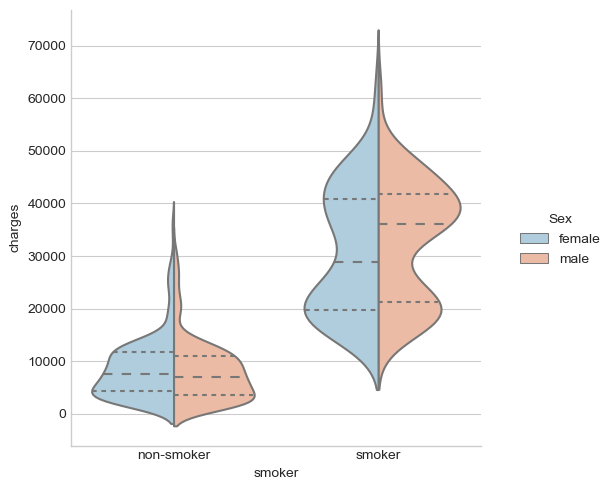

In [53]:
#Visualizing the collected data:
g = sns.catplot(x="smoker", y="charges", hue="sex",
            kind="violin", inner="quartiles", split=True,
            palette="RdBu_r", data=data, legend_out = True);

xlabels = ['non-smoker', 'smoker']
g.set_xticklabels(xlabels)

new_title = 'Sex'
g._legend.set_title(new_title)
g._legend.set_bbox_to_anchor([1.1, 0.5])
# replace labels
new_labels = ['female', 'male']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

In [54]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(charge_smokers, charge_nonsmokers, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

t_statistic: -32.751887766341824
p_value: 5.88946444671698e-103


#### Step 5 Determine the probability associated with the test statistic under the null hypothesis using sampling distribution of the test statistic

In [55]:
print('two-sample t-test p-value', p_value)

two-sample t-test p-value 5.88946444671698e-103


#### Step 6 Compare the probability associated with the test statistic with level of significance specified

at 5% significance level, $a$ = 0.05

In [56]:
p_value > 0.05

False

#### Conclusion Testing
* We **fail to Reject** the Null Hypothesis and state that **At 5% significance level, the mean charges of smokers and non - smokers are not equal.**
* Hence, charges of people who smoke indeed differ significantly from the people who don't.

### Does BMI of males differ significantly from that of females?

#### Step 1 define the null and alternative hypothesis
* $H_0$: $\mu_m$ = $\mu_f$ 
* $H_A$: $\mu_m$ != $\mu_f$

Where:

 - $\mu_m$ = Mean BMI of all male insured in our data
 - $\mu_f$ = Mean BMI of all female insured in our data
 
#### Step 2 Select an appropriate statistical test and the corresponding test statistic
We select a 2-sample t-test as our statistical test and the corresponding t statistic as our test statistic.
#### Step 3 Choose level of significance α
We select α = 0.05
#### Step 4 Collect data and calculate the value of test statistic

In [62]:
males = data[data['sex'] == 1]
females = data[data['sex'] == 0]
bmi_males = males['bmi']
bmi_females = females['bmi']

print(f'Number of males: {males.shape[0]}')
print(f'Variance in BMI of males: {np.var(bmi_males)}')
print(f'Number of females: {females.shape[0]}')
print(f'Variance in BMI of females: {np.var(bmi_females)}')

Number of males: 676
Variance in BMI of males: 37.6491607363954
Number of females: 662
Variance in BMI of females: 36.49917703379856


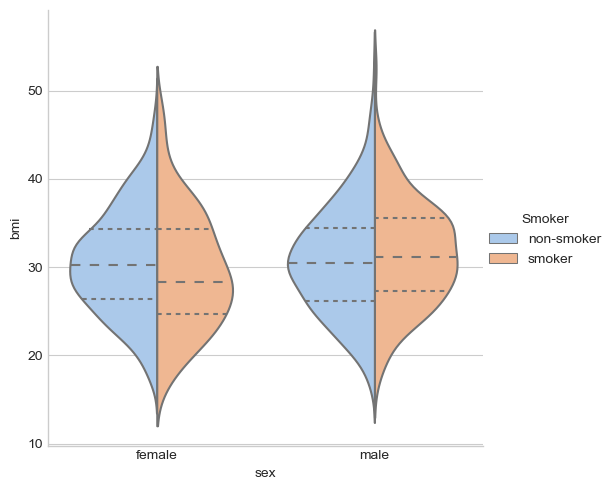

In [63]:
#Visualizing the collected data:
g = sns.catplot(x="sex", y="bmi", hue="smoker",
            kind="violin", inner="quartiles", split=True,
            palette="pastel", data=data, legend_out = True);

xlabels = ['female', 'male']
g.set_xticklabels(xlabels)

new_title = 'Smoker'
g._legend.set_title(new_title)
g._legend.set_bbox_to_anchor([1.1, 0.5])
# replace labels
new_labels = ['non-smoker', 'smoker']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

In [64]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(bmi_males, bmi_females, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

t_statistic: 1.697027933124022
p_value: 0.08992430667834876


#### Step 5 Determine the probability associated with the test statistic under the null hypothesis using sampling distribution of the test statistic

In [65]:
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 0.08992430667834876


#### Step 6: Compare the probability associated with the test statistic with level of significance specified
At 5% significance level, α = 0.05

In [66]:
p_value > 0.05

True

#### Conclusion Testing:  
 - We <b>Fail to Reject</b> the Null Hypothesis and state that <b>At 5% significance level, the mean BMI of insured males and females are equal</b>.
 - Hence, BMI of males do not differ significantly from that of females in our data.
 
### Is the proportion of smokers significantly different in different genders?
* 'sex' and 'smoker' are two categorical variables.
* We want to see if the proportion of smokers in the female population is significantly less than it is in the male population.

#### Define 1 State the null and alternative hypothesis
* $H_0$: $p_m$ = $p_f$ 
* $H_A$: $p_m$ != $p_f$

Where:
 - $p_m$ = Male Smokers / Total Male insured
 - $p_f$ = Female Smokers / Total Female insured
 
#### Step 2 Select an appropriate statistical test and the corresponding test statistic
We select a proportion Z - test as our statistical test and the corresponding Z statistic as our test statistic.
#### Step 3 Choose level of significance α
We select α = 0.05
#### Step 4 Collect data and calculate the value of test statistic

In [67]:
n_females = data['sex'].value_counts()[0] # number of females in the data
n_males = data['sex'].value_counts()[1] # number of females in the data

female_smokers = data[data['sex'] == 0].smoker.value_counts()[1] # number of female smokers
male_smokers = data[data['sex'] == 1].smoker.value_counts()[1] # number of male smokers

print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,4)*100}%, {round(159/676,4)*100}% respectively.')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 17.37%, 23.52% respectively.


[Text(0, 0, 'female'), Text(0, 1, 'male')]

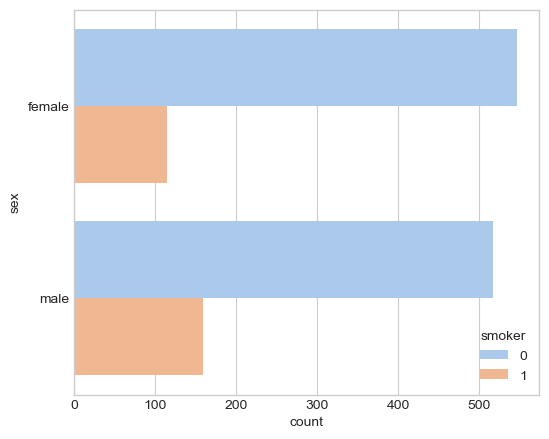

In [68]:
# Visualization of the collected data:
plt.figure(figsize=(6,5))
chart = sns.countplot(y = 'sex', hue = 'smoker', data = data)
chart.set_yticklabels(['female', 'male'])

In [69]:
# The proportions are different, but are they statistically significant?
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
print(f'Statistic: {stat}\np_value: {pval}')

Statistic: -2.7867402154855503
p_value: 0.005324114164320532


#### Step 5 Determine the probability associated with the test statistic under the null hypothesis using sampling distribution of the test statistic

In [70]:
if pval < 0.05:
    print(f'With a p-value of {pval} the difference is significant. We reject the Null Hypothesis.')
else:
    print(f'With a p-value of {pval} the difference is not significant. We fail to reject the Null Hypothesis')

With a p-value of 0.005324114164320532 the difference is significant. We reject the Null Hypothesis.


#### Conclusion
* We Reject the Null Hypothesis and state that At 5% significance level, the porportion of smokers in insured males and females are equal.
* Hence, proportion of smokers are significantly different in different genders.

### Is the distribution of bmi across women with no children, one child and two children, the same?
#### Analysis of variance (ANOVA)

ANOVA is a hypothesis testing technique tests the equality of two or more population means by examining the variances of samples that are taken.

ANOVA tests the general rather than specific differences among means.

#### Assumptions of ANOVA

* All populations involved follow a normal distribution
* All populations have the same variance
* The samples are randomly selected and independent of one another

#### Step 1 Define the null and alternative hypothesis
* $H_0$: $\mu_0$ = $\mu_1$ = $\mu_2$
* $H_A$: Atleast one of the means are different.

Where:
 - $\mu_i$ = Population mean of BMI of women having 0, 1 and 2 children.
 
#### Step 2 Select an appropriate statistical test and the corresponding test statistic
We select one way ANOVA as our test and mean BMI of the different groups as our test statistic.
#### Step 3 Choose level of significance α
We select α = 0.05.
#### Step 4 Collect data and calculate the value of test statistic
Here we have 3 groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

In [71]:
df = data[data['children'] <= 2]
female = df[df['sex'] == 0]
female.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.92400
5,31,0,25.74,0,0,2,3756.62160
6,46,0,33.44,1,0,2,8240.58960
9,60,0,25.84,0,0,1,28923.13692
11,62,0,26.29,0,1,2,27808.72510


this cells showing a visualization of the collected data that we test hypothesiscally

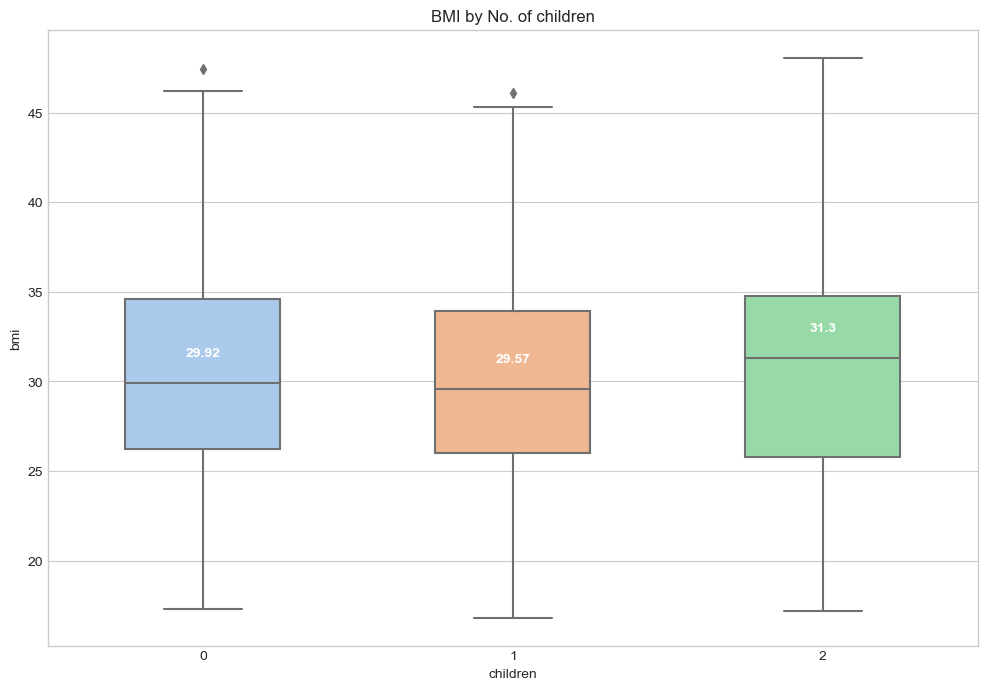

In [72]:
# Visualizing the collected data:
fig = plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x = "children", y = "bmi", data = female, width = 0.5)

medians = female.groupby(['children'])['bmi'].median().round(2)
vertical_offset = female['bmi'].median() * 0.05 # offset from median for display

medians
for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',color='w',weight='semibold')


plt.title('BMI by No. of children')
plt.show()

#### Step 5: Calculate p value using ANOVA table
* <code>statsmodels.formula.api.ols</code> creates a model from a formula and dataframe
* <code>statsmodels.api.sm.stats.anova_lm</code> gives an Anova table for one or more fitted linear models.

In [73]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('bmi ~ children', data = female).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


#### Step 6 Conclusion Testing
 - We <b>Fail to Reject</b> the null hypothesis that for BMI for 3 groups of women having no, one or two children respectively, mean BMI of all groups are equal.
 - Hence, the distribution of BMI across women with no children, one child and two children are the same.
 
#### Determine which mean(s) is / are different

* An ANOVA test will test that at least one mean is different. 
* We have falied to reject the null hypothesis but do not know which mean(s) is / are different.
We use Tukey-krammer HSD test to detect which mean(s) is / are different.

In [74]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(female['bmi'], female['children']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.3089 0.8641 -1.7185 1.1008  False
     0      2   0.2883 0.9003 -1.2636 1.8401  False
     1      2   0.5971 0.6961 -1.1322 2.3265  False
---------------------------------------------------
